In [1]:
import pyforest
from matplotlib_venn import venn3, venn2

In [3]:
og_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
nb_df_path = '/Users/jayceepang/msse/ATOM_CODE/datasets/holdout_data/featurized/'
samplings = ['none_scaled','UNDER','SMOTE']

In [6]:
all_og_dfs = [] 
all_og_neks = []
for nek in neks: 
    og_full_df = pd.read_csv(f'{og_df_path}{nek}_MFP_none_scaled.csv') 
    og_full_df['NEK'] =nek
    all_og_dfs.append(og_full_df)
    all_og_neks.append(nek)
og_df_dict = {}
for df, nek in zip(all_og_dfs, all_og_neks):
    og_df_dict[nek] = df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
all_nb_dfs = [] 
all_nb_neks = []
for nek in neks: 
    short_nek = nek[:4]
    nb_full_df = pd.read_csv(f'{nb_df_path}{short_nek}_MFP_none_unscaled.csv') 
    nb_full_df['NEK'] =nek
    all_nb_dfs.append(nb_full_df)
    all_nb_neks.append(nek)
    print(nb_full_df.shape)
nb_df_dict = {}
for df, nek in zip(all_nb_dfs, all_nb_neks):
    nb_df_dict[nek] = df

nb_full_df
nanobret_mols = df # can take any since all NEKs in NB are the same molecules
og_df_dict['nanobret'] = df

<IPython.core.display.Javascript object>

(400, 2053)


<IPython.core.display.Javascript object>

(400, 2053)


<IPython.core.display.Javascript object>

(400, 2053)


<IPython.core.display.Javascript object>

(400, 2053)


<IPython.core.display.Javascript object>

(400, 2053)


<IPython.core.display.Javascript object>

(400, 2053)


In [9]:
def common_unique_values(list1, list2, *lists):
    sets = [set(list1), set(list2)]
    for lst in lists:
        sets.append(set(lst))
    return set.intersection(*sets)


In [20]:
og_df_dict['nanobret']

,NEK,compound_id,base_rdkit_smiles,subset,active,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,NEK9_inhibition,3_IN_PP1,NC1=C2C(N(C(C)(C)C)N=C2C3=CNC4=C3C=CC=C4)=NC=N1,test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NEK9_inhibition,ALK_kinase_inhibitor_1,CN(CC1)CCN1C2=CC=C(NC3=NC=C4C(C(C5=C(OC)C=CC(F...,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NEK9_inhibition,ALW_II_49_7,O=C(C1=CC(NC2=CC(C(NC3=CC=CC(C(F)(F)F)=C3)=O)=...,test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NEK9_inhibition,AMG_47a,O=C(NC1=CC=CC(C(F)(F)F)=C1)C2=CC=C(C)C(C3=CC4=...,test,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,NEK9_inhibition,AST487,O=C(NC1=CC=C(OC2=NC=NC(NC)=C2)C=C1)NC3=CC=C(CN...,test,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEK9_inhibition,ZDG_7_53_1,CN1CCN(C2=CC=CC(NC3=NC=CC(C4=CC=C(NC([C@@H]5CC...,test,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396,NEK9_inhibition,ZDG_7_9,O=C1N(C2CCCC2)C3=C(C=NC(NC4=CC=C(C(NCC(F)F)=O)...,test,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
397,NEK9_inhibition,Zanzalintinib,O=C(C1=CC2=C(OC3=CC=C(NC(C4(CC4)C(NC5=CC=C(C=C...,test,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
398,NEK9_inhibition,ba_03_55_11,FC(F)(F)C1=CC(NC2=NC(C3=C4C=CC=NN4N=C3)=CC=N2)...,test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

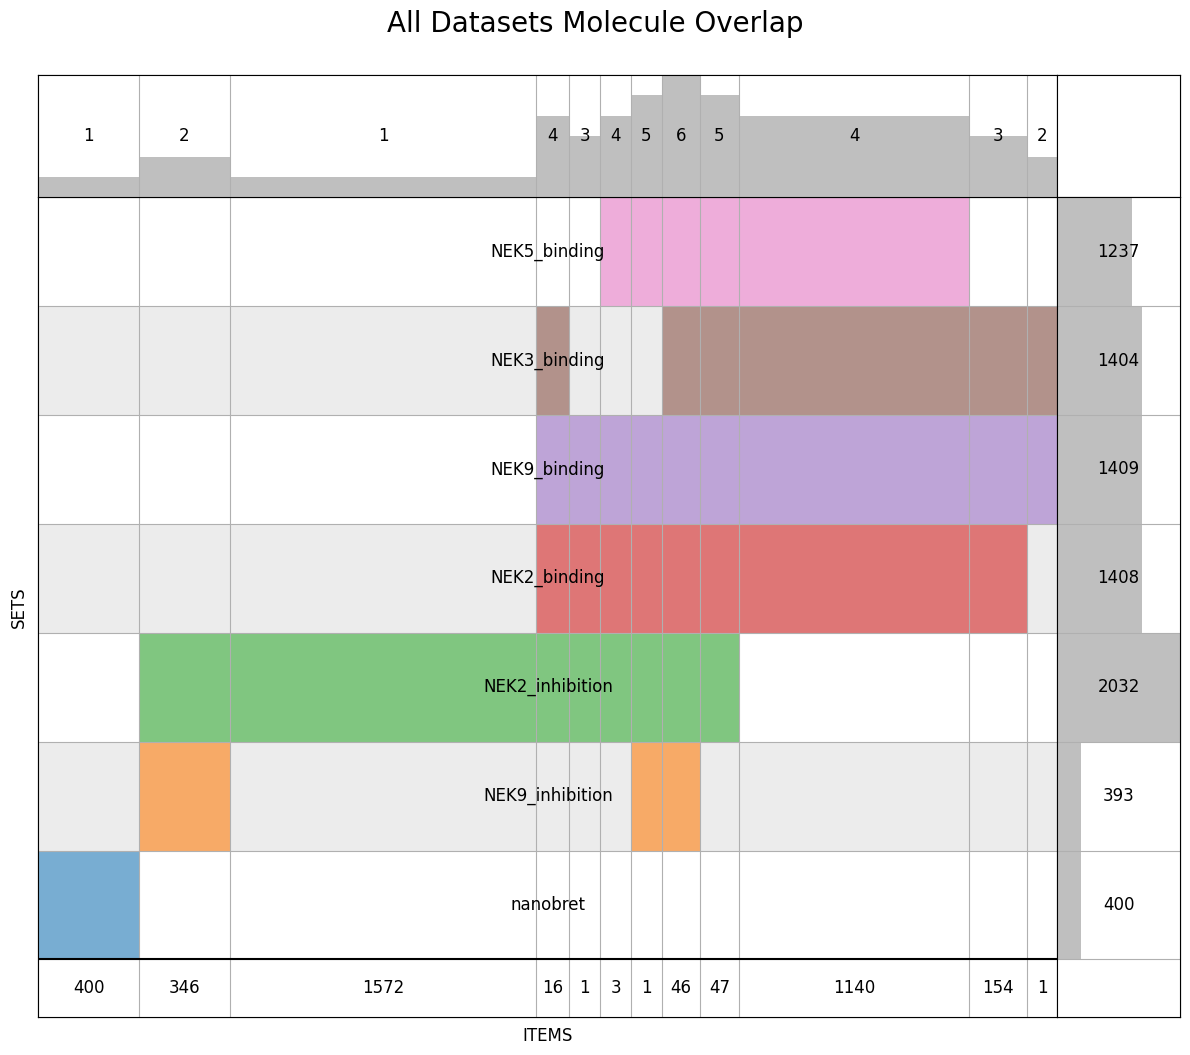

In [40]:
from supervenn import supervenn
nek_sets=[]
nek_labels=[]
for nek in og_df_dict.keys(): 
    this_nek = og_df_dict[nek] 
    nek_set = set(this_nek['base_rdkit_smiles'])
    nek_sets.append(nek_set)
    nek_labels.append(nek)
plt.figure(figsize=(12,10))
supervenn(nek_sets, nek_labels,sets_ordering='minimize gaps', side_plots=True,widths_minmax_ratio=0.1)

# plt.ylabel('Sets', fontsize = 16)
# plt.xlabel('')
plt.tight_layout()
plt.suptitle('All Datasets Molecule Overlap', fontsize =20, y = 1.05)
plt.savefig(f"NEK_supervesnn.png", bbox_inches='tight')

plt.show()